In [1]:
import rpy2.interactive 
import rpy2.interactive.packages
%load_ext rpy2.ipython

# Directly convert objects from pandas to r and vsv
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set the global figure size
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%R
# Load R libaries
library(ggplot2)
library(dplyr)
library(gridExtra)

In this problem set, you'll continue to explore the diamonds data set.

## price vs. x

In [3]:
%%R
# Your first task is to create a
# scatterplot of price vs x.
# using the ggplot syntax.
data(diamonds)
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


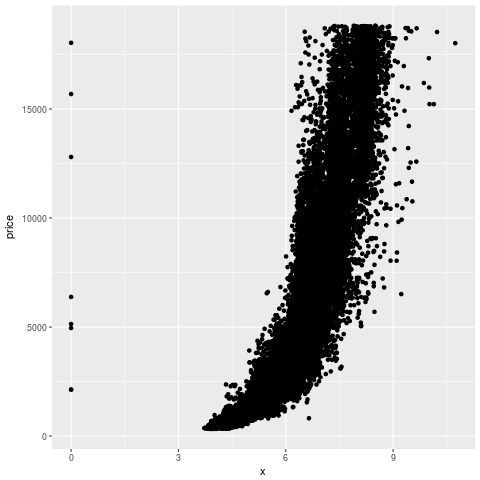

In [4]:
%%R
ggplot(aes(y=price, x=x), data = diamonds) + 
  geom_point()

In [5]:
diamonds = r.diamonds
diamonds.head()

R object with classes: ('tbl_df', 'tbl', 'data.frame') mapped to:
<DataFrame - Python:0x7f873d106708 / R:0xc9cfe60>
[Float..., Facto..., Facto..., ..., Float..., Float..., Float...]
  carat: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f873d10be08 / R:0x98d5750>
[0.230000, 0.210000, 0.230000, 0.290000, 0.310000, 0.240000]
  cut: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('ordered', 'factor') mapped to:
<FactorVector - Python:0x7f873d10b7c8 / R:0x98d9c10>
[       4,        3,        1,        3,        1,        2]
  color: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('ordered', 'factor') mapped to:
<FactorVector - Python:0x7f873d10bd88 / R:0x98db9f0>
[       1,        1,        1,        2,        3,        3]
  ...
  carat: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f873d10b948 / R:0x98

In [6]:
# Will have to convert the R object explicitily to a dataframe
diamonds = pandas2ri.ri2py_dataframe(r.diamonds)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


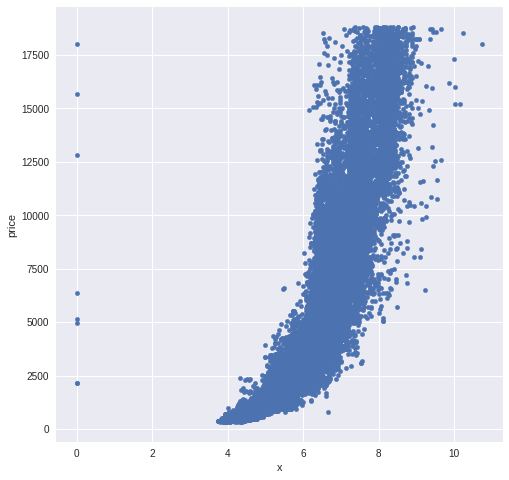

In [7]:
diamonds.plot.scatter(y= 'price', x ='x');

## Observations

- There seems to exist a strong positive correlation between rice and the x variable
- The number of observations seem to be positively correlated as well for both variables.

### From the Answer

- Outliers
- Exponential relationship!

## Correlations
Which are the correlations between price and x, y and z

In [8]:
%%R 
with(diamonds, cor.test(price, x))


	Pearson's product-moment correlation

data:  price and x
t = 440.16, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8825835 0.8862594
sample estimates:
      cor 
0.8844352 



In [9]:
%%R
with(diamonds, cor.test(price, y))


	Pearson's product-moment correlation

data:  price and y
t = 401.14, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8632867 0.8675241
sample estimates:
      cor 
0.8654209 



In [10]:
%%R
with(diamonds, cor.test(price, z))


	Pearson's product-moment correlation

data:  price and z
t = 393.6, df = 53938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8590541 0.8634131
sample estimates:
      cor 
0.8612494 



In [11]:
# Ideal for a nice little python script

for variable in('x', 'y', 'z'):
    print('Correlation of Price with  {}: {:.3f}'.format(variable, diamonds.price.corr(diamonds[variable])))

Correlation of Price with  x: 0.884
Correlation of Price with  y: 0.865
Correlation of Price with  z: 0.861


## price vs. depth

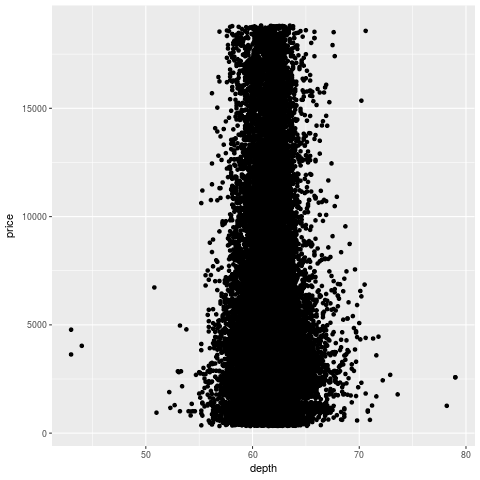

In [12]:
%%R
ggplot(aes(y=price, x=depth), data = diamonds) + 
  geom_point()

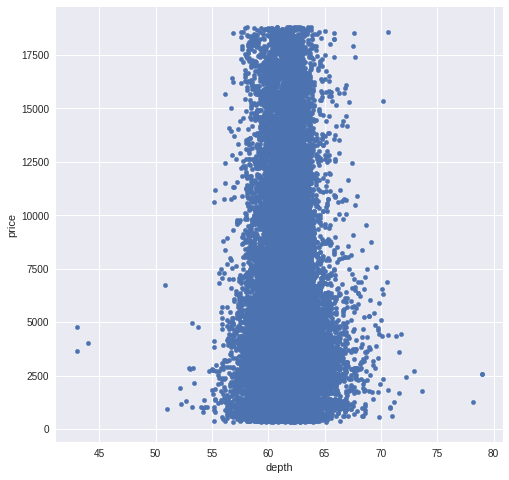

In [13]:
diamonds.plot.scatter(y= 'price', x ='depth');

## Adjustments - price vs. depth
Change the code to make the transparency of the
points to be 1/100 of what they are now and mark
the x-axis every 2 units. See the instructor notes
for two hints.

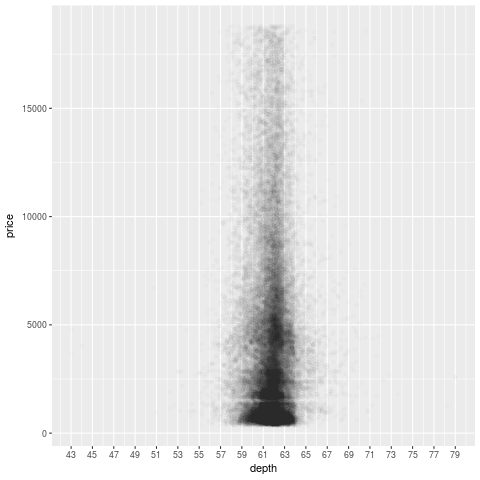

In [14]:
%%R
ggplot(aes(y=price, x=depth), data = diamonds) + 
  geom_point(alpha=1/100) +
  scale_x_continuous(breaks = seq(43,79,2))

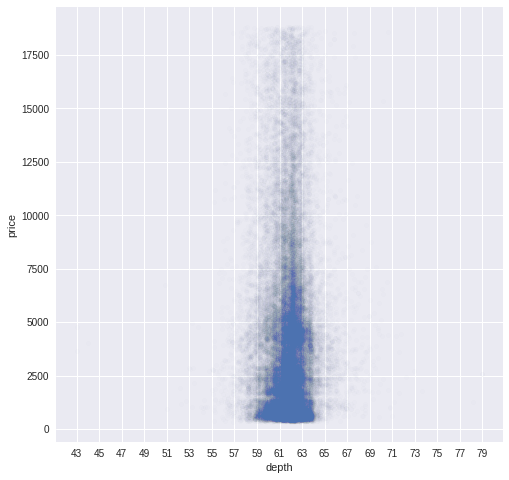

In [15]:
diamonds.plot.scatter(y= 'price', x ='depth', alpha=1/100)
# plt.xlim(43,79)
x=diamonds.depth
plt.xticks(np.arange(min(x), max(x)+1, 2.0));

## Typical Depth Range

Based on the scatterplot most diamonds are within what range?

Between 60 and 63

In [16]:
%%R
summary(diamonds$depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43.00   61.00   61.80   61.75   62.50   79.00 


In [17]:
diamonds.depth.describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

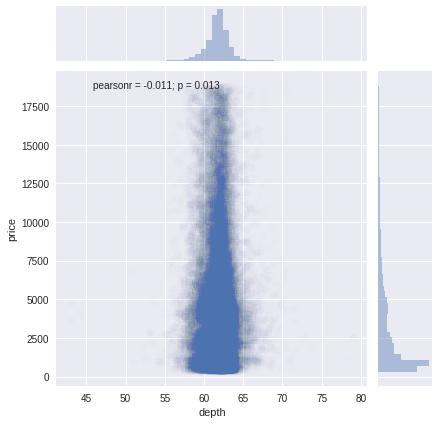

In [18]:
sns.jointplot(y= 'price', x ='depth', data=diamonds, alpha=1/100);

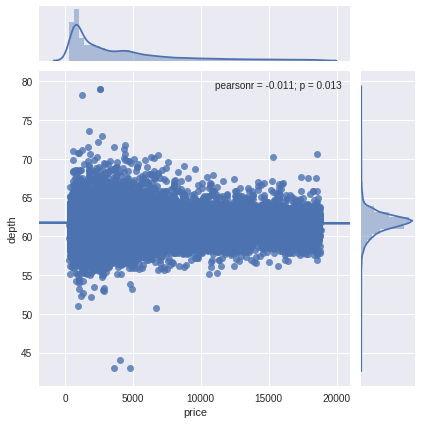

In [19]:
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='reg');

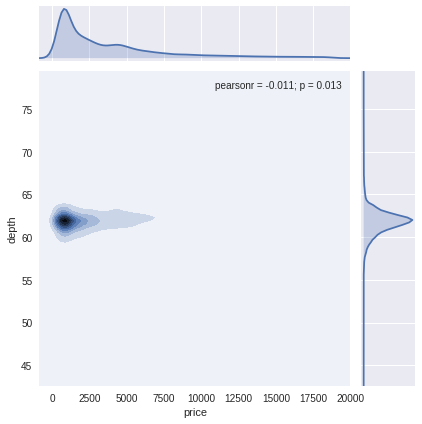

In [20]:
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='kde');

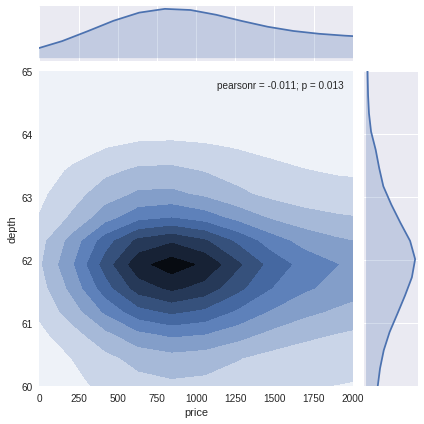

In [21]:
#Let's take a closer look
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='kde', xlim=(0,2000), ylim=(60,65));

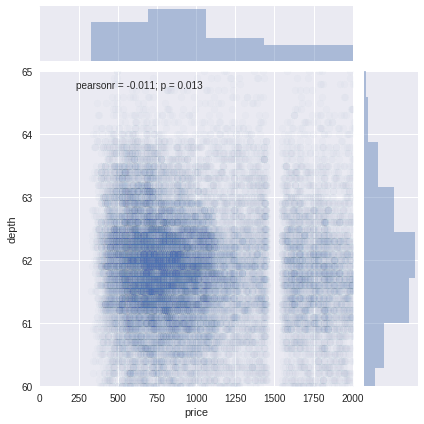

In [56]:
#Let's take a closer look
sns.jointplot(x= 'price', y ='depth', data=diamonds, kind='scatter', xlim=(0,2000), ylim=(60,65), alpha=1/50);

## price vs carat
Create a scatterplot of price vs carat
and omit the top 1% of price and carat
values.

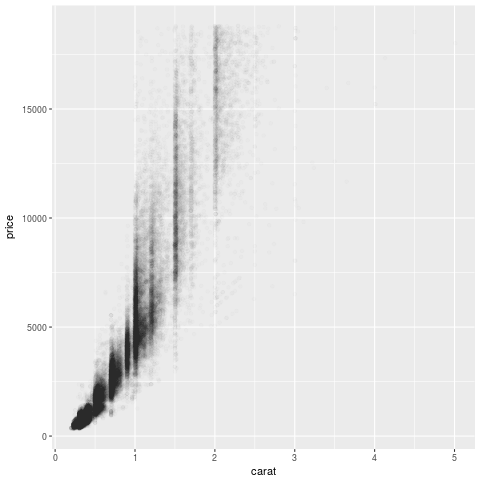

In [22]:
%%R
#First the plain one
ggplot(aes(x=carat, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  
    #xlim(0, quantile(diamonds$carat, 0.90)) + 
    #ylim(0, quantile(diamonds$carat, 0.90)) 

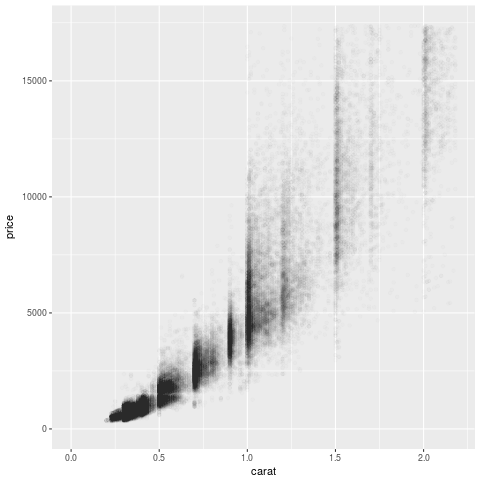

In [24]:
%%R
ggplot(aes(x=carat, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  +
    xlim(0, quantile(diamonds$carat, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

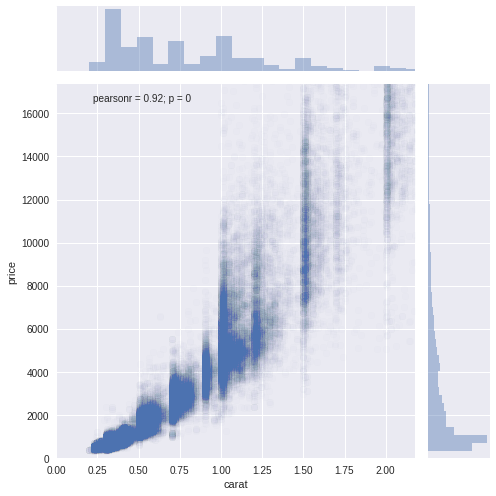

In [29]:
sns.jointplot(x= 'carat', y ='price', data=diamonds, kind='scatter',
              xlim=(0,diamonds.carat.quantile(.99)),
              ylim=(0,diamonds.price.quantile(.99)),
              alpha=1/100, size=7);

This is cool but I will try now to recreate the scatter plot without the marginal histograms and with a regression line

In [30]:
from scipy import stats

In [32]:
stats.pearsonr(diamonds.price, diamonds.carat)

(0.92159130119347676, 0.0)

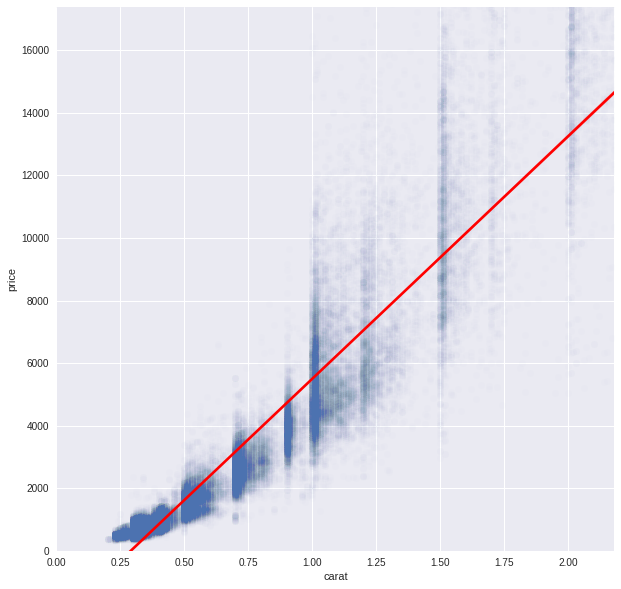

In [47]:
# This works butt dos not accept the pearson annotation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

g  = sns.regplot(x= 'carat', y ='price', data=diamonds, ax=ax,
                 scatter_kws={'alpha':1/100},
                 line_kws={'color':'red'})
g.set(xlim=(0,diamonds.carat.quantile(.99)),
      ylim=(0,diamonds.price.quantile(.99)));

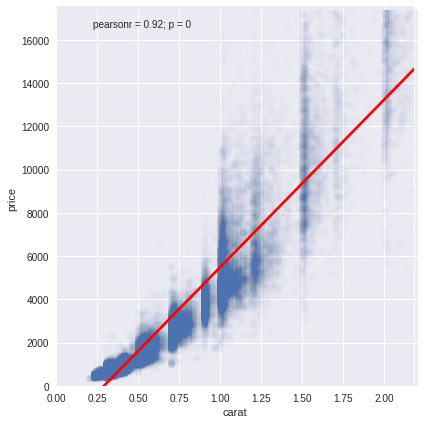

In [57]:
g = sns.JointGrid(x= 'carat', y ='price', data=diamonds, ratio=100,
                 xlim=(0,diamonds.carat.quantile(.99)),
                 ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             fit_reg=False)
g.annotate(stats.pearsonr);
# g.ax_marg_x.set_axis_off()
# g.ax_marg_y.set_axis_off()

##  price vs volume
Create a scatterplot of price vs. volume (x * y * z).
This is a very rough approximation for a diamond's volume.

Create a new variable for volume in the diamonds data frame.
This will be useful in a later exercise.

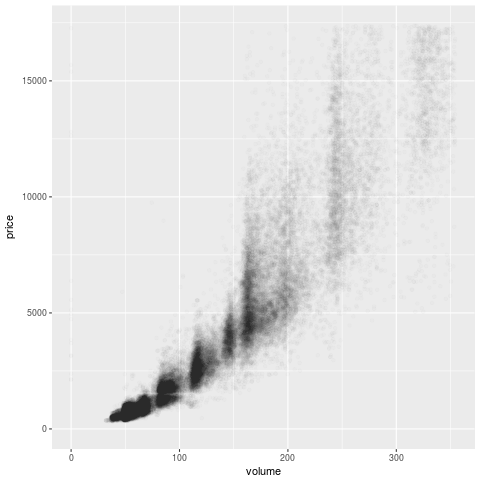

In [58]:
%%R
#create new variable
diamonds$volume <- diamonds$x * diamonds$y * diamonds$z

ggplot(aes(x=volume, y=price), data = diamonds) + 
  geom_point(alpha=1/100)  +
    xlim(0, quantile(diamonds$volume, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

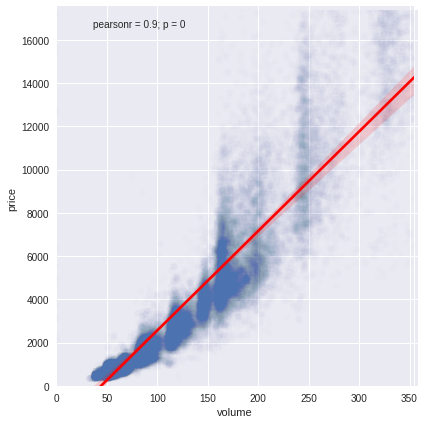

In [59]:
#let's get the update df from the r object ;)
diamonds = pandas2ri.ri2py_dataframe(r.diamonds)

g = sns.JointGrid(x= 'volume', y ='price', data=diamonds, ratio=100,
                 xlim=(0,diamonds.volume.quantile(.99)),
                 ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             line_kws={'color':'red'})
g.annotate(stats.pearsonr);

### Observations

- Strong positive correlation
- Most diamonds have a price below 8000 and volume below 200

## Outliers

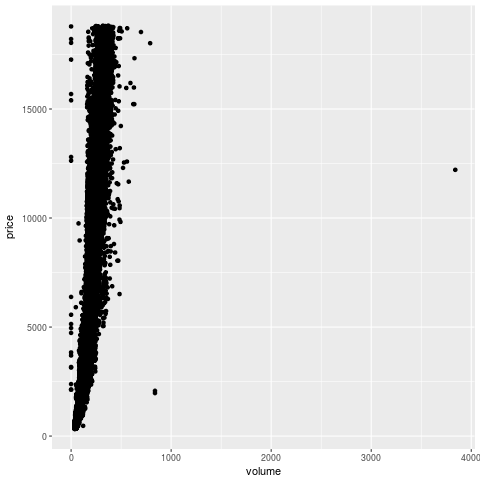

In [61]:
%%R
ggplot(aes(x=volume, y=price), data = diamonds) +
  geom_point()  

In [71]:
# Number of outliers with zero volume
diamonds[diamonds.volume==0].index.value_counts().sum()

20

## Correlation price vs volume
Exclude diamonds with a volume o or greater than 800

In [83]:
%%R
with(subset(diamonds, (diamonds$volume!=0 & diamonds$volume<800)), cor.test(volume, price))


	Pearson's product-moment correlation

data:  volume and price
t = 559.19, df = 53915, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9222944 0.9247772
sample estimates:
      cor 
0.9235455 



In [88]:
diamonds_sub = diamonds[(diamonds.volume!=0)&( diamonds.volume<800)]
diamonds_sub.volume.corr(diamonds_sub.price)

0.92354550185956141

!!You need to set the limitations beforehand if you want to get the right pearson score

### Adjustments
Subset the data to exclude diamonds with a volume
greater than or equal to 800. Also, exclude diamonds
with a volume of 0. Adjust the transparency of the
points and add a linear model to the plot. (See the
Instructor Notes or look up the documentation of
geom_smooth() for more details about smoothers.)

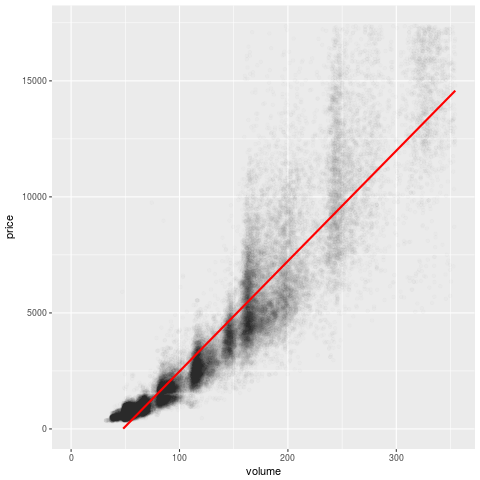

In [94]:
%%R
ggplot(aes(x=volume, y=price), data = subset(diamonds, (diamonds$volume!=0 & diamonds$volume<800)))+
         geom_point(alpha=1/100)  +
  geom_smooth(method = 'lm', color = 'red') + 
    xlim(0, quantile(diamonds$volume, 0.99)) + 
    ylim(0, quantile(diamonds$price, 0.99)) 

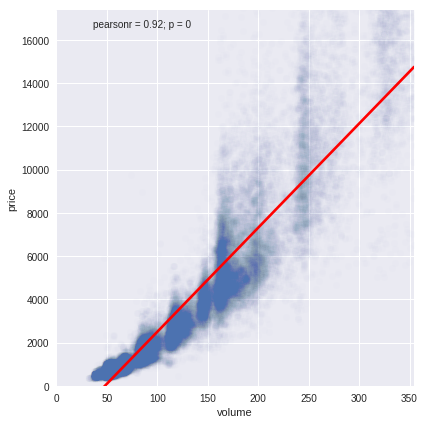

In [93]:
#Let's see how that looks in our graph
g = sns.JointGrid(x= 'volume', y ='price', data=diamonds_sub, ratio=100,
                  xlim=(0,diamonds.volume.quantile(.99)),
                  ylim=(0,diamonds.price.quantile(.99)))
                 
g.plot_joint(sns.regplot,
             scatter_kws={'alpha':1/100},
             line_kws={'color':'red'})
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off();